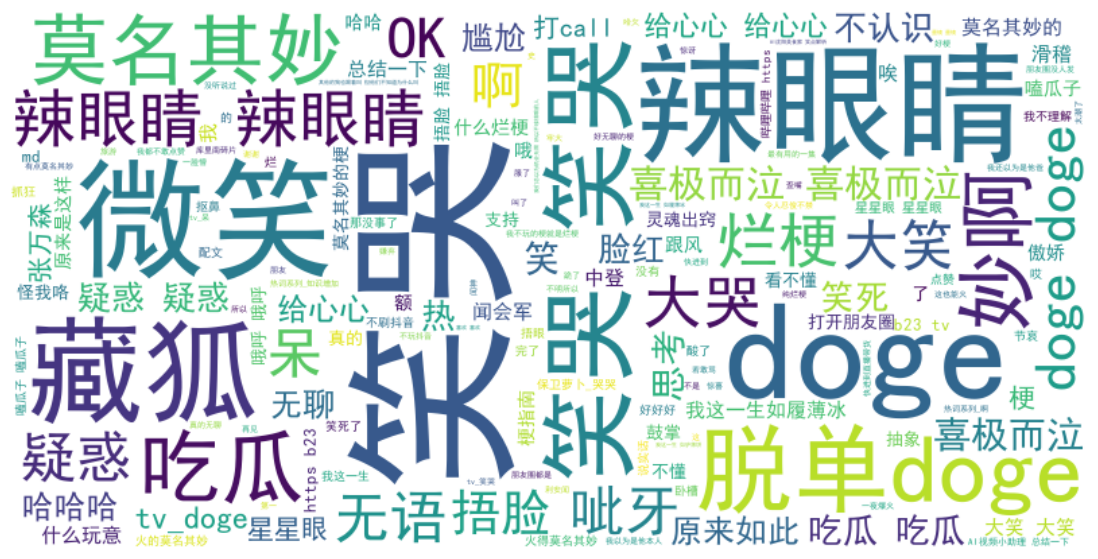

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#读取CSV文件
df = pd.read_csv('comments.csv', encoding='utf8')

# 合并评论内容
comments = ' '.join(df['评论内容'])

# 创建词云图
wordcloud = WordCloud(font_path='C:/Windows/Fonts/simhei.ttf', width=800, height=400, background_color='white').generate(comments)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 保存词云图片到本地
wordcloud.to_file('wordcloud_all.png')


## 统计前30个高频词并制作词云

前30高频词统计:
词语：“朋友圈”，次数：725
词语：“这个”，次数：539
词语：“以为”，次数：347
词语：“一个”，次数：319
词语：“什么”，次数：247
词语：“知道”，次数：195
词语：“doge”，次数：189
词语：“跟风”，次数：182
词语：“没有”，次数：172
词语：“就是”，次数：160
词语：“看到”，次数：150
词语：“自己”，次数：141
词语：“朋友”，次数：140
词语：“眼睛”，次数：131
词语：“莫名其妙”，次数：130
词语：“觉得”，次数：117
词语：“现在”，次数：114
词语：“真的”，次数：112
词语：“感觉”，次数：112
词语：“怎么”，次数：104
词语：“昨天”，次数：101
词语：“抖音”，次数：100
词语：“不是”，次数：98
词语：“照片”，次数：96
词语：“视频”，次数：89
词语：“这么”，次数：88
词语：“我们”，次数：87
词语：“这样”，次数：86
词语：“还是”，次数：85
词语：“这种”，次数：84


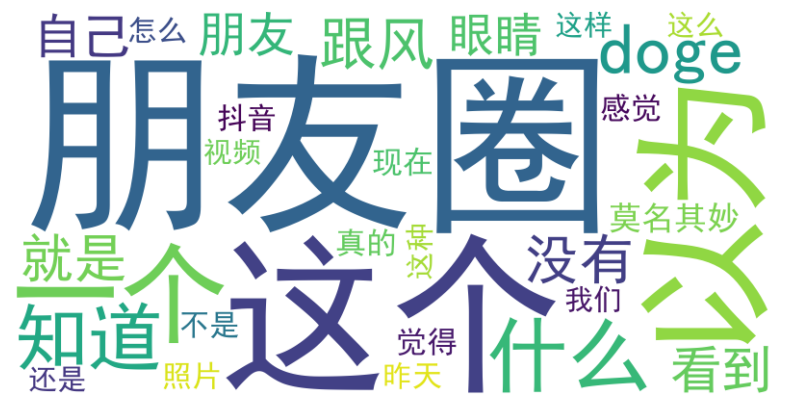

In [12]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 读取CSV文件
df = pd.read_csv('comments.csv')

words = {}
# 遍历每条评论
for content in df['评论内容']:
    # 对当前评论分词
    seg_list = jieba.lcut(content, cut_all=False)
     # 遍历分词结果
    for word in seg_list:
          # 过滤单字词
        if len(word) > 1:
            # 统计词频
            words[word] = words.get(word, 0) + 1
# 按照词频进行排序，取前30个高频词
top_30_words = sorted(words.items(), key=lambda d:d[1], reverse=True)[:30]
# 输出前30高频词
print('前30高频词统计:')
for word, freq in top_30_words:
    print(f'词语：“{word}”，次数：{freq}')

# 生成词云
wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white',stopwords=stopwords).generate_from_frequencies(dict(top_30_words))
# 保存词云图片到本地
wordcloud.to_file('wordcloud.png')
# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 过滤屏蔽词的词云图

前30高频词统计:
词语：“朋友圈”，次数：725
词语：“doge”，次数：189
词语：“跟风”，次数：182
词语：“看到”，次数：150
词语：“朋友”，次数：140
词语：“眼睛”，次数：131
词语：“莫名其妙”，次数：130
词语：“感觉”，次数：112
词语：“昨天”，次数：101
词语：“抖音”，次数：100
词语：“照片”，次数：96
词语：“视频”，次数：89
词语：“微笑”，次数：83
词语：“开始”，次数：78
词语：“无聊”，次数：77
词语：“同学”，次数：76
词语：“然后”，次数：76
词语：“全是”，次数：75
词语：“已经”，次数：68
词语：“有人”，次数：67
词语：“文案”，次数：65
词语：“喜欢”，次数：65
词语：“突然”，次数：64
词语：“人发”，次数：64
词语：“藏狐”，次数：62
词语：“指南”，次数：61
词语：“打开”，次数：60
词语：“他们”，次数：60
词语：“一下”，次数：59
词语：“一样”，次数：58


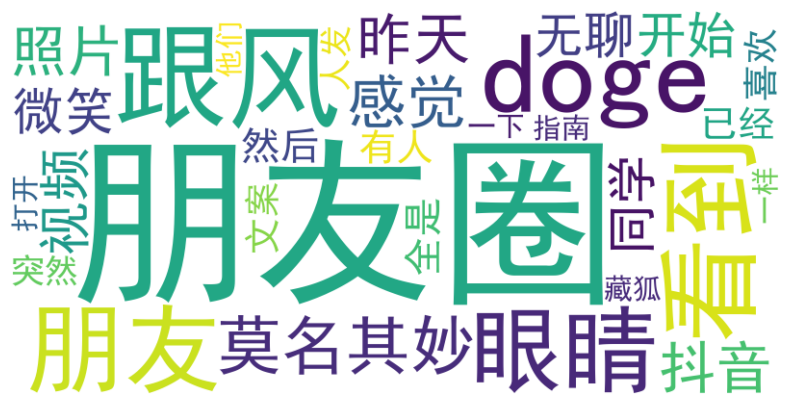

In [16]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 读取CSV文件
df = pd.read_csv('comments.csv')

words = {}
# 遍历每条评论
for content in df['评论内容']:
    # 对当前评论分词
    seg_list = jieba.lcut(content, cut_all=False)
     # 遍历分词结果
    for word in seg_list:
          # 过滤单字词
        if len(word) > 1:
            # 统计词频
            words[word] = words.get(word, 0) + 1

#设计屏蔽词
stopwords={"什么","没有","这个","真的","觉得","我们","这么","不是","还是","知道","现在",
           "一个","这样","自己","就是","可以","那么","怎么","不会","为什么","这种","不要",
           "以为"}
# 过滤屏蔽词
filtered_words = {word: freq for word, freq in words.items() if word not in stopwords}

# 按照词频进行排序，取前30个高频词
top_words = sorted(filtered_words.items(), key=lambda d:d[1], reverse=True)
top_30_words = top_words[:30]
# 输出前30高频词
print('前30高频词统计:')
for word, freq in top_30_words:
    print(f'词语：“{word}”，次数：{freq}')
# 生成词云
wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400,background_color='white',stopwords=stopwords).generate_from_frequencies(dict(top_30_words))
# 保存词云图片到本地
wordcloud.to_file('wordcloud_filtered.png')

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
